In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sympy import symbols, diff, lambdify, expand

In [5]:
def lagrange_interpolation (points_x, points_y):  
    param = symbols('x')
    n = len(points_x)
    yx = 0
    Ljx = [0.0 for j in range (n)]    
    a = [None for j in range (n)]
    # For j = 0,1,2,....,n   
    for j in range (n):
        Fjx = 1
        Fjxj = 1
        for r in range (n):
            if (r != j):
                # Fjx = PRODUCT (x-xr)
                Fjx = Fjx * (param - points_x[r])
                Fjxj = Fjxj * (points_x[j] - points_x[r])
        #Ljx = Fjx / Fjxj
        Ljx[j] = Fjx.expand()/Fjxj

    # a[j] = y(j)
    for j in range (n):
        a[j] = points_y[j]

    # yx = SUM (aj*Ljx)
    for j in range (n):
        yx = yx + a[j] * Ljx[j]             
    return yx 

In [6]:
###PART A
B = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
H = [0.0, 14.7, 36.5, 71.7, 121.4, 197.4, 256.2, 348.7, 540.6, 1062.8, 2318.0, 4781.9, 8687.4, 13924.3, 22650.2]


print ('Part A')
points_x = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
print ('B = ', points_x)
points_y = [0.0, 14.7, 36.5, 71.7, 121.4, 197.4]
print ('H = ', points_y)
a = lagrange_interpolation(points_x, points_y)
print (a)

Part A
B =  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
H =  [0.0, 14.7, 36.5, 71.7, 121.4, 197.4]
414.062500000009*x**5 - 963.54166666669*x**4 + 873.437500000015*x**3 - 215.208333333338*x**2 + 88.6500000000005*x


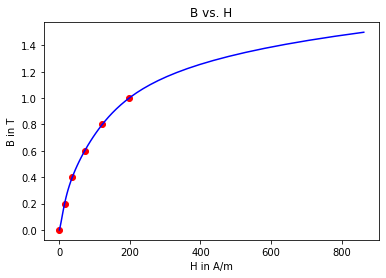

In [7]:
### PART A PLOT
plt.plot(points_y, points_x, 'bo', color = "red" )
#plt.plot(N, R, '', color = "red")

x = np.linspace(0,1.5)
y = 414.062500000009*x**5 - 963.54166666669*x**4 + 873.437500000015*x**3 - 215.208333333338*x**2 + 88.6500000000005*x
plt.plot(y,x, 'r',color = 'blue',label = 'Approximated Function')

plt.xlabel('H in A/m')
plt.ylabel('B in T')

plt.title('B vs. H')
plt.show()

In [8]:
###PART B
print ('Part B')
points_x = [0.0, 1.3, 1.4, 1.7, 1.8, 1.9]
print ('B = ', points_x)
points_y = [0.0, 540.6, 1062.8, 8687.4, 13924.3, 22650.2]
print ('H = ', points_y)
b = lagrange_interpolation(points_x, points_y)
print (b)

Part B
B =  [0.0, 1.3, 1.4, 1.7, 1.8, 1.9]
H =  [0.0, 540.6, 1062.8, 8687.4, 13924.3, 22650.2]
156393.280524088*x**5 - 966235.57224511*x**4 + 2253820.22115058*x**3 - 2337828.82945774*x**2 + 906781.854422079*x


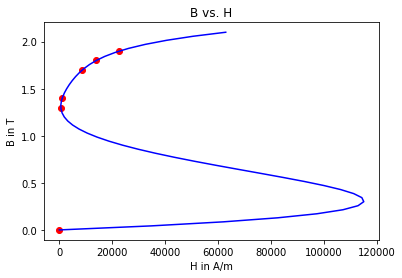

In [9]:
### PART B PLOT
plt.plot(points_y, points_x, 'bo', color = "red" )
#plt.plot(N, R, '', color = "red")

x = np.linspace(0,2.1)
y = 156393.280524088*x**5 - 966235.57224511*x**4 + 2253820.22115058*x**3 - 2337828.82945774*x**2 + 906781.854422079*x
plt.plot(y,x, 'r',color = 'blue',label = 'Approximated Function')

plt.xlabel('H in A/m')
plt.ylabel('B in T')

plt.title('B vs. H')
plt.show()

In [12]:

def cubic_hermite(points_x,points_y):
    n = len(points_x)
    param = symbols('x')
    Ujx = []
    Vjx = []
    yx = 0
    # Lj(x)
    Ljx = [None for j in range (n)]
    #L'j(x)
    Ljx_prime = [None for j in range (n)]
    b = [None for j in range (n)] 
    a = [None for j in range (n)] 

    for j in range(n):
        Fjx = 1
        Fjxj = 1
        for r in range (n):
            if (r != j):
                # Fjx = PRODUCT (x-xr)
                Fjx = Fjx * (param - points_x[r])
                Fjxj = Fjxj * (points_x[j] - points_x[r])
        # To obtain Lj(x)
        # Lj(x) = Fjx / Fjxj
        Ljx = Fjx.expand() / Fjxj

        #To obtain L'j(x), diff Lj(x) / dx
        Ljx_prime = lambdify(param, diff(Ljx))

        U = (1 - 2 * Ljx_prime(points_x[j]) * (param - points_x[j]))*(Ljx**2)
        Ujx.append(U)
        V = (param - points_x[j])*(Ljx * Ljx)
        Vjx.append(V)

    # a[j] = y(j)
    for j in range (n):
        a[j] = points_y[j]

    # b[j] = y'(j)
    for j in range (n):
        if (j < (n-1)):    
            b[j] = (points_y[j + 1] - points_y[j]) / (points_x[j + 1] - points_x[j])
        elif (j == (n-1)):
            b[j] = points_y[j]/points_x[j]

    # y(x) = SUM (a*Ujx + b*Vjx)
    for j in range(n):
        yx = yx + a[j]*Ujx[j] + b[j]*Vjx[j]
    yx = expand(yx)
    return yx


In [13]:
    print ('Part C')
    points_x = [0.0, 1.3, 1.4, 1.7, 1.8, 1.9]
    print ('B = ', points_x)
    points_y = [0.0, 540.6, 1062.8, 8687.4, 13924.3, 22650.2]
    print ('H = ', points_y)
    c = cubic_hermite(points_x, points_y)
    print ('H = ',c)

Part C
B =  [0.0, 1.3, 1.4, 1.7, 1.8, 1.9]
H =  [0.0, 540.6, 1062.8, 8687.4, 13924.3, 22650.2]
H =  1734143651.0417*x**11 - 25207926894.739*x**10 + 162399433091.79*x**9 - 608575443825.474*x**8 + 1461887595692.59*x**7 - 2334363871169.64*x**6 + 2477827583874.83*x**5 - 1685862719412.73*x**4 + 667146472644.371*x**3 - 116995129462.297*x**2 + 415.846153846154*x


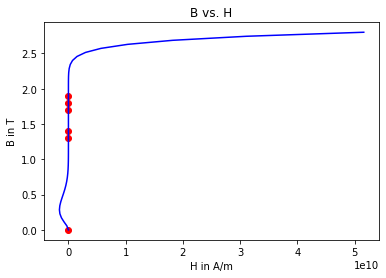

In [14]:
### PART C PLOT
plt.plot(points_y, points_x, 'bo', color = "red" )
#plt.plot(N, R, '', color = "red")

x = np.linspace(0,2.8)
#x = symbols('x')
y = 1734143651.0417*x**11 - 25207926894.739*x**10 + 162399433091.79*x**9 - 608575443825.474*x**8 + 1461887595692.59*x**7 - 2334363871169.64*x**6 + 2477827583874.83*x**5 - 1685862719412.73*x**4 + 667146472644.371*x**3 - 116995129462.297*x**2 + 415.846153846154*x
plt.plot(y,x, 'r',color = 'blue',label = 'Approximated Function')

#plt.plot(y, (x,0,100),xlabel='B',ylabel='H')

plt.xlabel('H in A/m')
plt.ylabel('B in T')

plt.title('B vs. H')
plt.show()

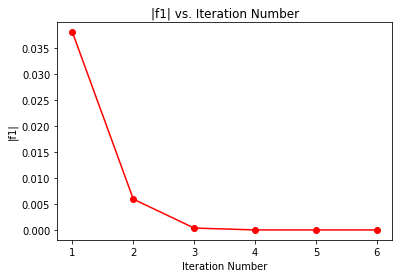

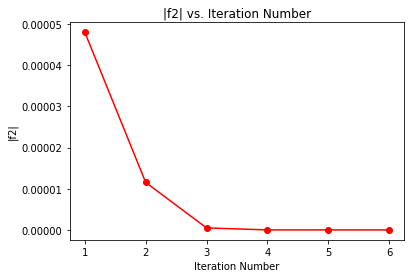

In [44]:
#QUESTION 2B

i1 = [1,2,3,4,5,6]
f1 = [0.03797622055434545,0.005918277697945149,0.0003541257681694866,9.406043097598404e-07,8.462917866491892e-12,0.0]
i2 = [1,2,3,4,5,6]
f2 = [4.8001808035091884e-05,1.1538035340957757e-05,4.869660430844707e-07,1.627918842005767e-09,1.2450340780047198e-14,6.776263578034403e-21]

pd.set_option("display.max_rows", 200)
plt.plot(i1, f1, 'bo', color = "red" )
plt.plot(i1, f1, '', color = "red")

plt.xlabel('Iteration Number')
plt.ylabel('|f1|')

plt.title('|f1| vs. Iteration Number')
plt.show()

plt.plot(i2, f2, 'bo', color = "red" )
plt.plot(i2, f2, '', color = "red")

plt.xlabel('Iteration Number')
plt.ylabel('|f2|')

plt.title('|f2| vs. Iteration Number')
plt.show()

In [34]:
new_dataframe = pd.DataFrame(
{
"# iteration": i1,
"|f1|": f1,
"|f2|": f2
}
)

pd.set_option("display.max_columns", 200)

new_dataframe

,# iteration,|f1|,|f2|
0,1,3.797622e-02,4.800181e-05
1,2,5.918278e-03,1.153804e-05
2,3,3.541258e-04,4.869660e-07
3,4,9.406043e-07,1.627919e-09
4,5,8.462918e-12,1.245034e-14
5,6,0.000000e+00,6.776264e-21
